<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/20250121_HSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# https://drive.google.com/drive/folders/1BApIvbQgnp7dAMK0rrRnG-026k_LMBT-

file_path = '/content/drive/MyDrive/03_HI_soil_analysis/HSH/HSH_MASTER_DB_pulled20250121.csv'

# Load CSV into a DataFrame
data = pd.read_csv(file_path, header=1)

# Display the first few rows of the DataFrame
data.head()

data.columns

Index(['Intake_number', 'primary_project', 'secondary_project',
       'tertiary_project', 'sampling_round', 'land_ownership', 'old_SH_1',
       'SH_1', 'barcode', 'depth_top ',
       ...
       'Unnamed: 95', 'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98',
       'Unnamed: 99', 'Unnamed: 100', 'Unnamed: 101', 'Unnamed: 102',
       'Unnamed: 103', 'Unnamed: 104'],
      dtype='object', length=105)

In [66]:
print(data.columns.tolist())

['Intake_number', 'primary_project', 'secondary_project', 'tertiary_project', 'sampling_round', 'land_ownership', 'old_SH_1', 'SH_1', 'barcode', 'depth_top ', 'depth_bottom ', 'date_sampled', 'island', 'site_name', 'treatment', 'site_number', 'current_land_use', 'years_under_current_land_use', 'most_previous_land_use', 'years_under_most_previous _land_use', 'additional_previous _land_use ', 'years_under_additional_previous _land_use', 'additional_previous_land_use_2', 'years_under_additional_previous_land_use_2', 'additional_previous_land_use_3', 'years_under_additional_previous_land_use_3', 'plot_name', 'plot_area', 'current_plant_cover', 'previous_crop_cover', 'fertilizer_type_1', 'fertilizer_rate_1', 'fertilizer_type_2', 'fertilizer_rate_2', 'fertilizer_type_3', 'fertilizer_rate_3', 'fertilizer_type_4', 'fertilizer_rate_4', 'fertilizer_type_5', 'fertilizer_rate_5', 'tillage', 'tillage_frequency', 'herbicide', 'pesticide', 'irrigation_type', 'additional_soil_cover', 'soil_series', 'l

In [67]:
# Remove extra spaces from column names
data.columns = data.columns.str.strip()

# Verify the updated column names
print(data.columns.tolist())

['Intake_number', 'primary_project', 'secondary_project', 'tertiary_project', 'sampling_round', 'land_ownership', 'old_SH_1', 'SH_1', 'barcode', 'depth_top', 'depth_bottom', 'date_sampled', 'island', 'site_name', 'treatment', 'site_number', 'current_land_use', 'years_under_current_land_use', 'most_previous_land_use', 'years_under_most_previous _land_use', 'additional_previous _land_use', 'years_under_additional_previous _land_use', 'additional_previous_land_use_2', 'years_under_additional_previous_land_use_2', 'additional_previous_land_use_3', 'years_under_additional_previous_land_use_3', 'plot_name', 'plot_area', 'current_plant_cover', 'previous_crop_cover', 'fertilizer_type_1', 'fertilizer_rate_1', 'fertilizer_type_2', 'fertilizer_rate_2', 'fertilizer_type_3', 'fertilizer_rate_3', 'fertilizer_type_4', 'fertilizer_rate_4', 'fertilizer_type_5', 'fertilizer_rate_5', 'tillage', 'tillage_frequency', 'herbicide', 'pesticide', 'irrigation_type', 'additional_soil_cover', 'soil_series', 'lati

In [68]:
# Remove extra spaces from the 'current_land_use' column
data['current_land_use'] = data['current_land_use'].str.strip()


In [69]:
# Define the mapping dictionary for transformations
category_mapping = {
    'Managed Forest': 'Managed forest',
    'Cropland-banana': 'Banana/plantain',
    'Platano': 'Banana/plantain',
    'Unmanaged/abandoned ag land': 'Unmanaged/abandoned cropland/pasture',
    'horticulutral and vegetable': 'Horticultural/vegetable',
    'crop land': 'Cropland',
    'Protected Forest': 'Protected forest',
    'Home garden': 'Horticultural/vegetable',
    'Agroforestry, Cropland, Orchard': 'Cropland',
    'Unmanaged pasture': 'Unmanaged/abandoned cropland/pasture',
    'Unmanaged/abandoned cropland': 'Unmanaged/abandoned cropland/pasture'
}

# Apply the mapping to the 'current_land_use' column
data['current_land_use'] = data['current_land_use'].replace(category_mapping)

# Verify the updated categories
print(data['current_land_use'].value_counts())


current_land_use
Cropland                                684
Orchard                                 233
Pasture                                 175
Agroforestry                            156
Unmanaged forest                        155
Protected forest                        120
Unmanaged/abandoned                      64
Managed forest                           53
Horticultural/vegetable                  25
Unmanaged/abandoned cropland/pasture     16
Banana/plantain                          16
City/state park                          15
Mal                                       9
Pineapple or sugarcane plantation         5
Shrubland                                 3
Silvopasture                              3
Name: count, dtype: int64


In [70]:
print(data['current_land_use'].unique())

['Cropland' 'Unmanaged/abandoned' 'Pineapple or sugarcane plantation'
 'Pasture' 'Managed forest' 'Protected forest' 'Agroforestry'
 'City/state park' 'Orchard' nan 'Shrubland'
 'Unmanaged/abandoned cropland/pasture' 'Silvopasture' 'Unmanaged forest'
 'Banana/plantain' 'Mal' 'Horticultural/vegetable']


In [71]:
# Filter data for depth_top = 0 and depth_bottom in [15, 20]
filtered_data = data[(data['depth_top'] == 0) & (data['depth_bottom'].isin([15, 20]))]


In [72]:
print(filtered_data.shape)

(1529, 105)


In [73]:
# Check columns
required_columns = ['minerals', 'current_land_use', 'PIAL_none', 'suborder', 'toc']
print([col for col in required_columns if col in filtered_data.columns])

# Check for missing values
print(filtered_data[required_columns].isna().sum())


['minerals', 'current_land_use', 'PIAL_none', 'suborder', 'toc']
minerals              0
current_land_use      2
PIAL_none           690
suborder              8
toc                   2
dtype: int64


In [74]:
# Summarize 'toc' by specified columns

#'PIAL_none' has a bunch of missing data, ignore for now

grouped_data = filtered_data.groupby(
    ['minerals', 'current_land_use', 'suborder']
)['toc'].describe()

# Display the summarized data
print(grouped_data)


                                                        count       mean  \
minerals current_land_use                     suborder                     
HAC      Agroforestry                         Aquept      6.0   4.535000   
                                              Torrert     1.0   0.990000   
                                              Ustept      6.0   4.236667   
         Banana/plantain                      Ustert     16.0   1.157500   
         City/state park                      Aquept      3.0   4.476667   
...                                                       ...        ...   
PNCM     Unmanaged/abandoned                  Ustand      2.0   4.795000   
         Unmanaged/abandoned cropland/pasture Udand       4.0  10.492500   
Sand     City/state park                      Sand        3.0  21.676667   
         Orchard                              Psamment    6.0   6.445000   
         Unmanaged/abandoned                  Psamment    3.0   3.706667   

           

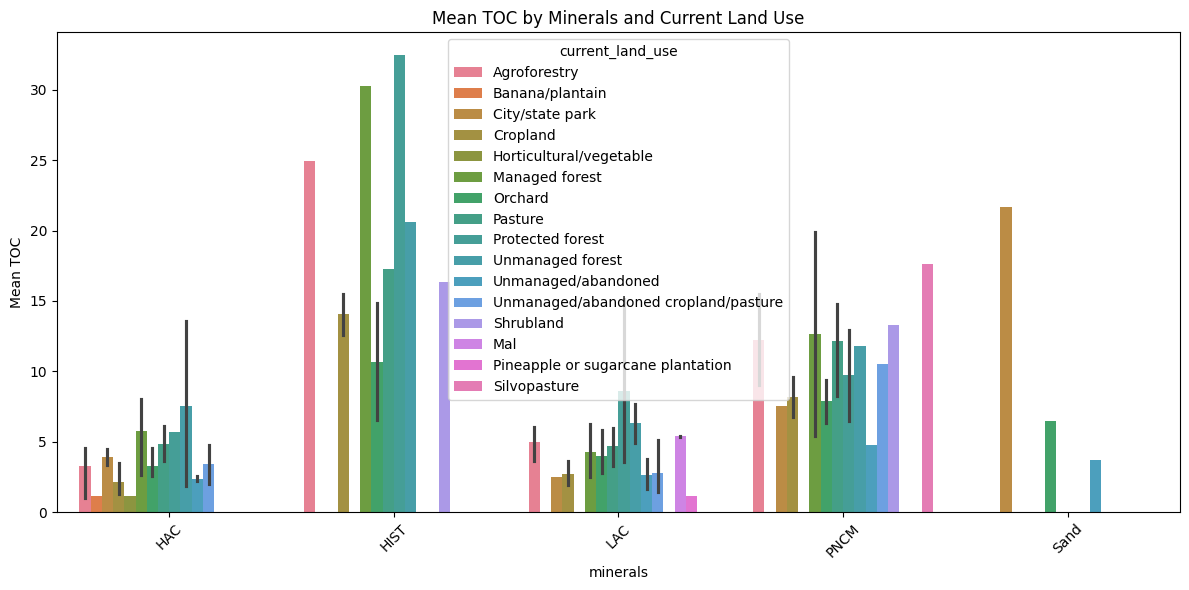

In [76]:
# Compute means for visualization
mean_toc = filtered_data.groupby(
    ['minerals', 'current_land_use', 'suborder']
)['toc'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=mean_toc,
    x='minerals',
    y='toc',
    hue='current_land_use'
)
plt.title('Mean TOC by Minerals and Current Land Use')
plt.ylabel('Mean TOC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


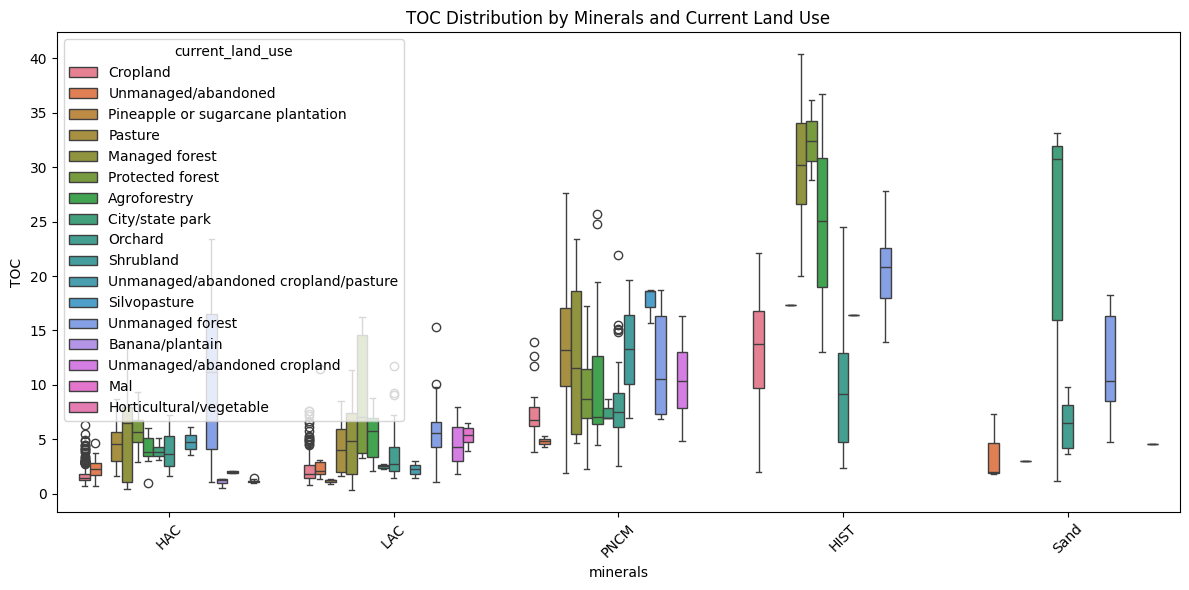

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_data,
    x='minerals',
    y='toc',
    hue='current_land_use'
)
plt.title('TOC Distribution by Minerals and Current Land Use')
plt.ylabel('TOC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


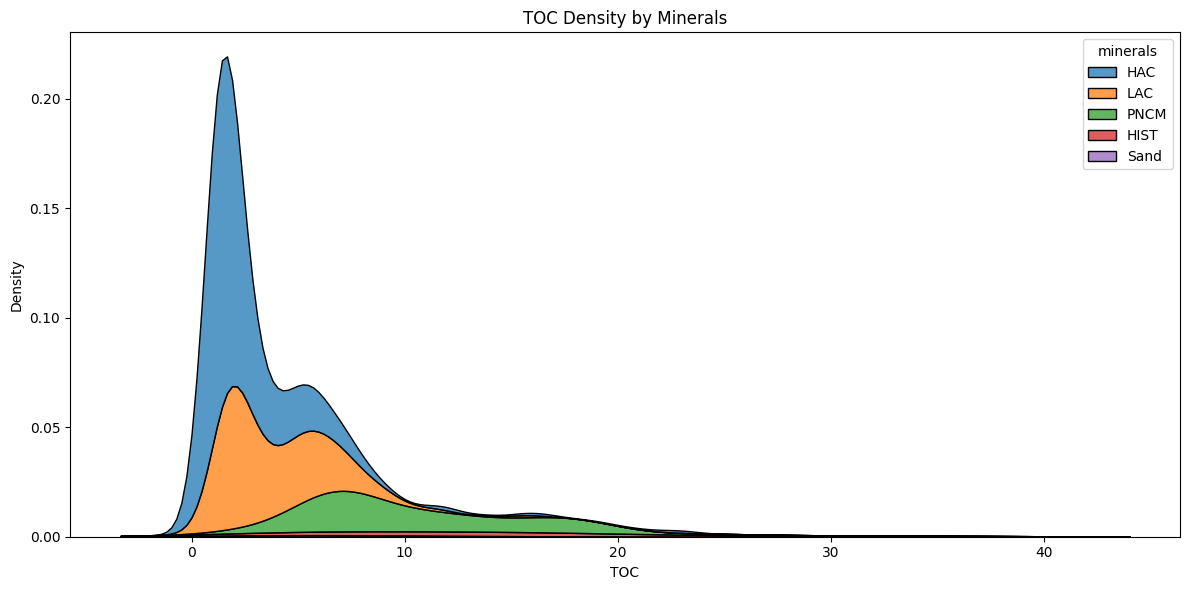

In [53]:
plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=filtered_data,
    x='toc',
    hue='minerals',
    multiple="stack"
)
plt.title('TOC Density by Minerals')
plt.xlabel('TOC')
plt.tight_layout()
plt.show()
